<a href="https://colab.research.google.com/github/Rohan7810/Codesoft/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ALL_Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
from matplotlib import gridspec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix



Importing data set

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

SHOWING THE STARTING VALUES

In [ ]:
train_data.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [ ]:
test_data.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146087 entries, 0 to 146086
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      146087 non-null  int64  
 1   Time    146087 non-null  float64
 2   V1      146087 non-null  float64
 3   V2      146087 non-null  float64
 4   V3      146087 non-null  float64
 5   V4      146087 non-null  float64
 6   V5      146087 non-null  float64
 7   V6      146087 non-null  float64
 8   V7      146087 non-null  float64
 9   V8      146087 non-null  float64
 10  V9      146087 non-null  float64
 11  V10     146087 non-null  float64
 12  V11     146087 non-null  float64
 13  V12     146087 non-null  float64
 14  V13     146087 non-null  float64
 15  V14     146087 non-null  float64
 16  V15     146087 non-null  float64
 17  V16     146087 non-null  float64
 18  V17     146087 non-null  float64
 19  V18     146087 non-null  float64
 20  V19     146087 non-null  float64
 21  V20     14

In [ ]:
print(train_data.shape)
print(train_data.describe())

(219129, 32)
                  id           Time             V1             V2  \
count  219129.000000  219129.000000  219129.000000  219129.000000   
mean   109564.000000   62377.415376       0.096008       0.048345   
std     63257.237906   25620.348569       1.395425       1.159805   
min         0.000000       0.000000     -29.807725     -44.247914   
25%     54782.000000   47933.000000      -0.846135      -0.573728   
50%    109564.000000   63189.000000       0.385913       0.046937   
75%    164346.000000   77519.000000       1.190661       0.814145   
max    219128.000000  120580.000000       2.430494      16.068473   

                  V3             V4             V5             V6  \
count  219129.000000  219129.000000  219129.000000  219129.000000   
mean        0.592102       0.069273      -0.161555       0.133688   
std         1.132884       1.253125       1.069530       1.202411   
min       -19.722872      -5.263650     -37.591259     -25.659750   
25%        -0.027154

In [ ]:
print(test_data.shape)
print(test_data.describe())

(146087, 31)
                  id           Time             V1             V2  \
count  146087.000000  146087.000000  146087.000000  146087.000000   
mean   292172.000000  144637.928166       0.512929      -0.013098   
std     42171.828725   14258.025396       1.628455       1.247749   
min    219129.000000  120580.000000     -34.755944     -37.803827   
25%    255650.500000  132698.000000      -0.679988      -0.715885   
50%    292172.000000  144493.000000       0.285798       0.009058   
75%    328693.500000  156140.000000       1.974015       0.827420   
max    365215.000000  172790.000000       2.452901      12.390128   

                  V3             V4             V5             V6  \
count  146087.000000  146087.000000  146087.000000  146087.000000   
mean       -0.697478      -0.273258       0.321856      -0.050204   
std         1.292522       1.365752       1.146215       1.332880   
min       -18.934952      -5.497560     -25.639591     -14.133040   
25%        -1.619268

In [ ]:
obj = (train_data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (train_data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (train_data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 0
Integer variables: 2
Float variables: 30


In [ ]:
fraud = train_data[train_data['Class'] == 1]
valid = train_data[train_data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('"Fraud Cases:" {}'.format(len(train_data[train_data['Class'] == 1])))
print('"Valid Transactions:" {}'.format(len(train_data[train_data['Class'] == 0])))

0.002144882465928839
"Fraud Cases:" 469
"Valid Transactions:" 218660


In [ ]:
print(" Details of the fraud transaction")
fraud.Amount.describe()

 Details of the fraud transaction


count     469.000000
mean      108.391002
std       376.603036
min         0.000000
25%         1.000000
50%         8.760000
75%        39.950000
max      4471.960000
Name: Amount, dtype: float64

In [ ]:
print("Details of valid transaction")
valid.Amount.describe()

Details of valid transaction


count    218660.000000
mean         66.269651
std         149.935158
min           0.000000
25%           5.990000
50%          21.900000
75%          68.970000
max        7475.000000
Name: Amount, dtype: float64

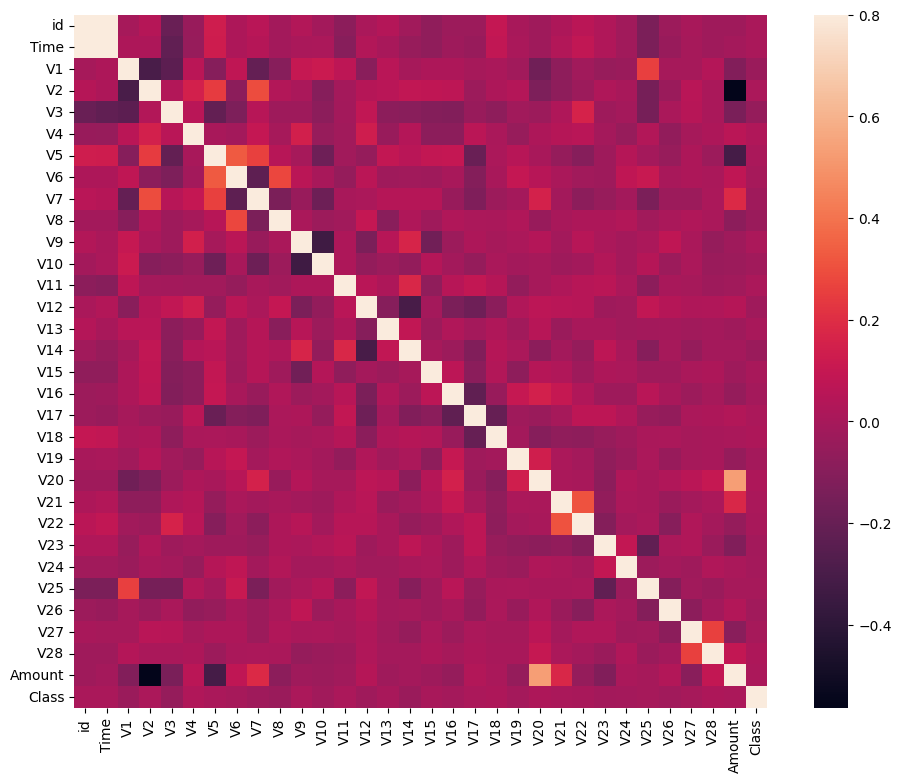

In [ ]:
# Correlation matrix
corrmat = train_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
train_inputs = train_data.drop(['id', 'Time', 'Amount', 'Class'], axis=1)
train_outputs = train_data['Class']
# Extracting the input parameters
test_inputs = test_data.drop(['id', 'Time', 'Amount'], axis=1)
# Split the train dataset into train and validation datasets
train_inputs, val_inputs, train_outputs, val_outputs = train_test_split(train_inputs, train_outputs, test_size=0.2, random_state=49)

# Shapes of the datasets
print("Train Input Shape:", train_inputs.shape)
print("Train Output Shape:", train_outputs.shape)
print("Validation Input Shape:", val_inputs.shape)
print("Validation Output Shape:", val_outputs.shape)
print("Test Input Shape:", test_inputs.shape)


Train Input Shape: (175303, 28)
Train Output Shape: (175303,)
Validation Input Shape: (43826, 28)
Validation Output Shape: (43826,)
Test Input Shape: (146087, 28)


we get the file of test_predictions

In [ ]:
# Separate features and target variable
train_features = train_data.drop(['id', 'Time', 'Class'], axis=1)
train_target = train_data['Class']

# Split the train dataset in validation set
X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2, random_state=49)


random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


y_val_pred = random_forest.predict(X_val)

accuracy = (y_val_pred == y_val).mean()
print("Validation Accuracy:", accuracy)


X_test = test_data.drop(['id', 'Time'], axis=1)


test_predictions = random_forest.predict(X_test)


test_predictions_df = pd.DataFrame({'id': test_data['id'], 'Class': test_predictions})

test_predictions_df.to_csv('test_predictions.csv', index=False)


Validation Accuracy: 0.9976041619130197


In [ ]:
X_train = train_data.drop('Class', axis=1)
y_train = train_data['Class']

# logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


X_test = test_data
y_pred = model.predict(X_test)

print(y_pred)


[0 0 0 ... 0 0 0]


In [ ]:
# Separate features and target variable
train_features = train_data.drop(['id', 'Time', 'Class'], axis=1)
train_target = train_data['Class']

X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

# Training  random forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


y_val_pred = random_forest.predict(X_val)


confusion_mat = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[43721     1]
 [  104     0]]


Confusion Matrix: We can nalyze the performance

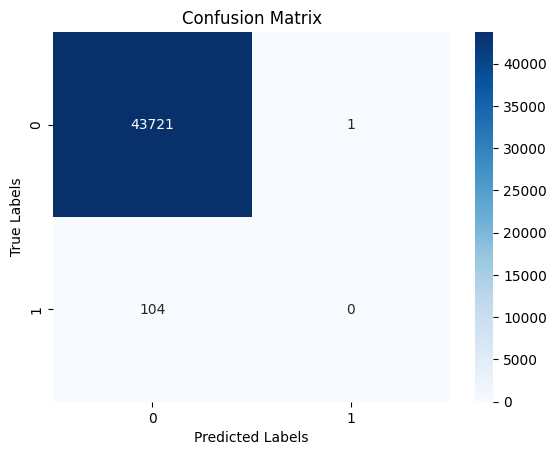

In [ ]:
train_features = train_data.drop(['id', 'Time', 'Class'], axis=1)
train_target = train_data['Class']


X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2, random_state=42)


random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


y_val_pred = random_forest.predict(X_val)


confusion_mat = confusion_matrix(y_val, y_val_pred)

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#True Positives (TP): 0
#True Negatives (TN): 43721
#False Positives (FP): 1
#False Negatives (FN): 104
